A Way of Implementing Statistical Methods for Ordinal Data to Researchers
---
Elisabeth Svensson,Journal of Mathematics and System Science 2 (2012) 8-12


The frequency distribution of ordinal data from certain population with size $n$ on a five-point scale, the ordered categories being 
$$A < B < C < D < E$$

degrees scaled from very satisfied, $A$, to very un-satisfied, $E$, 5scales. Let $X$ be pre-category data, $Y$ be post-category data 

某個單位, 工作人員對工作環境的滿意度從極好到極差, 分為五個等級, 為了提高工作人員對環境的滿意度, 公司決定重新裝修辦公室, 並且回收了 243  調查紀錄, 其中 X 代表裝修前員工的評價, Y 代表裝修後員工的評價. 裝修的代價, 是否提高了員工對環境的滿意度？

Other Applications
---
檢驗受訓前後的認知是否有明顯的差別? 手術前後, 吃藥前後, 病人的不舒服感是否有效改善?

Relative Position, **RP**
---
with value within (-1,1),  estimates the difference between the probabilities of the marginal distribution Y being shifted toward higher categories than X and the opposite, $\mathbf{P} (X < Y) – \mathbf{P} (Y < X)$.  A positive value of **RP**, indicates that the data set $Y$ has systematically toward higher categories than $X$ has, and negative  toward lower categories:

$$RP=\frac{1}{n^2}\sum_i y_iC(X)_{i-1}-\frac{1}{n^2}\sum_i x_iC(Y)_{i-1}$$
where $C(X),C(Y)$: Accumated Frequencies of $X,Y$ respectively. In brief, RP is a sign of a homogeneous group change which could reflect the efficacy of certain plan for the group and reflects the  what future trends become.  


Relative rank variance, **RV**,
---
is defined by the sum squares of aug-rank differences:
$$RV=\frac{6}{n^3}\sum_i\sum_j  \left(\bar{R}_{ij}^{(X)}-\bar{R}_{ij}^{(Y)}\right)^2x_{ij}$$

where $n$ is the total sample size and:

\begin{eqnarray}
\bar{R}_{ij}^{(X)}&=&\sum_k^{i-1}\sum_j x_{kj}+\sum_{\nu=1}^{j-1}x_{i\nu}
                 +\frac{1}{2}\left(1+x_{ij}\right) \\
\bar{R}_{ij}^{(Y)}&=&\sum_k^{j-1}\sum_i x_{ik}+\sum_{\nu=1}^{i-1}x_{\nu j}
                 +\frac{1}{2}\left(1+x_{ij}\right) \\                
\end{eqnarray}

RV indicates sign of individual heterogeneity in changes, or individual variation in changes.

The percentage un-satisfication, **PA**, is 0:

$$\frac{f_{EE}+f_{DD}}{\text{total}}=0$$


In [1]:
import numpy as np
from scipy.stats import t,norm
from ipy_table import make_table,apply_theme,set_cell_style,set_column_style,set_row_style
%precision 4

'%.4f'

In [4]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle on/off the raw Python code, click <a href="javascript:code_toggle()">
[<code style="background-color:brown;color:yellow;"> here </code>]</a>.''')

Jackknife Resampling
---
<code>
Like Harry Potter looking for sword of gryffindor in Gringotts.
</code>

Suppose that  $\phi(X)$ be the estimator from $X$, here RP and RV included.
The $^{i,j}$th pseudovalue of $\phi(X)$ is the same estimator from the submatrix of $X$, by deleting $i$ column and 
$j$ row of $X$, and denoted as $ \phi_{i,j}(X)$ .

In [9]:

S=np.array([
       [' Y\X ','1','...','i','...','m'],
       ['1','X11','...','X1i','...','X1m'],
       ['⁞','','','','',''],
       ['j','Xj1','...','Xji','...','Xjm'],
       ['⁞','','','','',''],
       ['m','Xm1','...','Xmi','...','Xmm']
])
make_table(S)
apply_theme('basic_both')
set_cell_style(0,0, thick_border='left,top')
#set_cell_style(0, 0, color='lightblack')
set_column_style(0, color='lightgray')
set_column_style(3, color='gray')
set_row_style(3, color='gray')
#for i in range(1,n+1):
#    set_cell_style(i,n+1-i, thick_border='all',color="lightbrown")

set_cell_style(0, 0, color='orange')

Y\X,1,...,i,...,m
1,X11,...,X1i,...,X1m
⁞,,,,,
j,Xj1,...,Xji,...,Xjm
⁞,,,,,
m,Xm1,...,Xmi,...,Xmm



One can then obtain confidence intervals and carry out statistical tests using the Central Limit The- orem. Specifically, let
$$\bar  \phi(X)=\frac{\sum\limits_{i,j}\phi_{i,j}(X)}{n}, V(\bar\phi(X))=\frac{\sum\limits_{i,j}(\phi_{i,j}(X)-\bar  \phi(X))^2}{n-1}$$
be the mean and sample variance of the pseudovalues. The **Jackknife** $(1-\alpha)\%$ **confidence interval** for $\phi(X)$ is:
$$\mathbf{\left( 
\bar  \phi(X)+z_{\alpha/2}\sqrt{\frac{V(\bar\phi(X))}{n}},\bar  \phi(X)+z_{1-\alpha/2}\sqrt{\frac{V(\bar\phi(X))}{n}}
\right)}$$
where $Z$ represents the standard normal random variable, and $z_{\alpha}$ is the percent point at $\alpha$ for Z, i.e.
$$\mathbf{Pr(Z<z_\alpha)=\alpha}$$

In [10]:
tabledata=np.array([[0,15,0,8,0],[0,0,16,62,10],[0,0,20,43,0],
                   [0,5,0,0,45],[0,0,3,16,0]])

Sub-Matrix  Slicing of Numpy array
---
The following slices the numpy ndarray by deleting `(i)`-row and `(j)`-column:
<code style="color:brown">
np.delete(np.delete(tabledata,j-1,1),i-1,0)
</code>

In [11]:
# displat the ordinal data 
make_table(tabledata)

0,15,0,8,0
0,0,16,62,10
0,0,20,43,0
0,5,0,0,45
0,0,3,16,0


In [12]:
def ordinalData(tabledata, category=['A','B','C','D','E']):
    n=len(tabledata)
    Span_data=np.array([])
    for k in range(n+1):
      if k==0:
         column_ex= np.append(np.array(['Y\X']),category)
         column_ex= np.append(column_ex,'Total')   
         #column_ex= np.append(np.array([' \ ']),category)   
         Span_data=np.append(Span_data,column_ex)
      else:
         Sdata=np.array([category[-k]])
         total=  np.sum(tabledata[-k]) 
         Sdata=np.append(Sdata,tabledata[-k])
         Sdata=np.append(Sdata,total)   
         Span_data=np.append(Span_data,Sdata)
    # sum for each pre-Category data        
    Span_data= np.append(Span_data,'Total')        
    Span_data= np.append(Span_data,np.sum(tabledata,axis=0))
    Span_data= np.append(Span_data,np.sum(tabledata))        
    Span_data=Span_data.reshape([n+2,n+2])
    
    return Span_data

In [13]:
Sdata=ordinalData(tabledata)
n=len(tabledata)
make_table(Sdata)

apply_theme('basic_both')
set_cell_style(0,0, thick_border='left,top')
#set_cell_style(0, 0, color='lightblack')
set_column_style(0, color='lightgray')
for i in range(1,n+1):
    set_cell_style(i,n+1-i, thick_border='all',color="lightbrown")

set_cell_style(0, 0, color='orange')

Y\X,A,B,C,D,E,Total
E,0,0,3,16,0,19
D,0,5,0,0,45,50
C,0,0,20,43,0,63
B,0,0,16,62,10,88
A,0,15,0,8,0,23
Total,0,20,39,129,55,243


In [22]:
def senssonRP(tabledata):
    AvgX=np.sum(tabledata,axis=0)
    AvgX=AvgX/sum(AvgX)
    AvgY=np.sum(tabledata,axis=1)
    AvgY=AvgY/sum(AvgY)
    CX=np.zeros(len(AvgX))
    for i in range(len(AvgX)-1):
        CX[len(AvgX)-i-1]=sum(AvgX[:len(AvgX)-i-1])
    CY=np.zeros(len(AvgY))
    for i in range(len(AvgY)-1):
        CY[len(AvgY)-i-1]=sum(AvgY[:len(AvgY)-i-1])
    RP=sum(AvgY*CX-AvgX*CY)
    
    return RP

In [23]:
def senssonRV(tabledata):
    
    n=len(tabledata[0])
    RX=np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            RX[i][j]=np.sum(tabledata[:i][:n])+sum(tabledata[i][:j])+(1+tabledata[i][j])/2
    RY0=np.zeros([n,n])
    tabledata1=tabledata.transpose()
    for i in range(n):
        for j in range(n):
            RY0[i][j]=np.sum(tabledata1[:i][:n])+sum(tabledata1[i][:j])+(1+tabledata1[i][j])/2
    RY=RY0.transpose() 
    RV=np.sum((RX-RY)*(RX-RY)*tabledata)/np.sum(tabledata)**3*6
    return RV

In [24]:
def RPJackknife(tabledata):
    n=len(tabledata)
    tt=np.array([])
    for i in range(n):
        for j in range(n):
            tt=np.append(tt,senssonRP(np.delete(np.delete(tabledata,j,1),i,0)))
    return tt.reshape([n,n])      

In [25]:
def RVJackknife(tabledata):
    n=len(tabledata)
    tt=np.array([])
    for i in range(n):
        for j in range(n):
            tt=np.append(tt,senssonRV(np.delete(np.delete(tabledata,j,1),i,0)))
    return tt.reshape([n,n])      

In [27]:
def SvenssonRPCIs(tabledata,p=0.95):
    RP=senssonRP(tabledata)
    RPJ=RPJackknife(tabledata)
    pp=norm.ppf((1+p)/2, loc=0)
    a=RP-pp*RPJ.std()/np.sqrt(len(tabledata[0])**2)
    b=RP+pp*RPJ.std()/np.sqrt(len(tabledata[0])**2)
    if int(p*100) == float(p*100):
       decimals = 0
    else:
       decimals = 1 # Assumes 2 decimal places for money

    print('{0:.{1}f}'.format(p*100, decimals),"% confidence interval of RP, ",'{0:.{1}f}'.format(RP, 3),":")
    print(" CIs:  (%.3f,%.3f)" %(a,b))
    print(O+'\n--[----------- ○ -----------]--'+W)
    print(" %.3f     %0.3f     %.3f " %(a,RP,b))
    if (RP<0):
        result="Toward the Lower A"
    else:
        result="Toward the Upper E"
    print("\nConclusion: %s" %result)    

In [167]:
#Reference  the bottom

W  = '\033[0m'  # white (normal)
R  = '\033[31m' # red
G  = '\033[32m' # green
O  = '\033[1;33m' # orange
B  = '\033[34m' # blue
P  = '\033[35m' # purple

T =  '\033[1;33;47m' #Title

In [45]:
def SvenssonRVCIs(tabledata,p=0.95):
    RV=senssonRV(tabledata)
    RVJ=RVJackknife(tabledata)
    pp=norm.ppf((1+p)/2, loc=0)
    a=RV-pp*RVJ.std()/np.sqrt(len(tabledata[0])**2)
    b=RV+pp*RVJ.std()/np.sqrt(len(tabledata[0])**2)
    if int(p*100) == float(p*100):
       decimals = 0
    else:
       decimals = 1 # Assumes 2 decimal places for money

    print(T+' {0:.{1}f}'.format(p*100, decimals),"% confidence interval of RV, ",'{0:.{1}f}'.format(RV, 3),":"+W)
    print(" CIs:  (%.3f,%.3f)" %(a,b))
    print(B+'\n--[----------- ○ -----------]--'+W)
    print(" %.3f       %0.3f       %.3f " %(a,RV,b))
    if (RV<0.2):
        result="Individual Variation is small"
    elif (RV<0.6):
        result="Individual Variation has to be concerned"
    else:
        result="Individual Variation is ver large"
    print("\nConclusion: %s" %result)    

# Estimated RP and 95%/97.5% Confidence Intervals 

In [40]:
SvenssonRPCIs(tabledata)

95 % confidence interval of RP,  -0.538 :
 CIs:  (-0.609,-0.467)

--[----------- ○ -----------]--
 -0.609     -0.538     -0.467 

Conclusion: Toward the Lower A


In [39]:
SvenssonRPCIs(tabledata,p=0.975)

97.5 % confidence interval of RP,  -0.538 :
 CIs:  (-0.620,-0.456)

--[----------- ○ -----------]--
 -0.620     -0.538     -0.456 

Conclusion: Toward the Lower A


# Estimated RV and 95% Confidence Intervals 

In [168]:
SvenssonRVCIs(tabledata)

 95 % confidence interval of RV,  0.221 :
 CIs:  (0.194,0.248)

--[----------- ○ -----------]--
 0.194       0.221       0.248 

Conclusion: Individual Variation has to be concerned


Conclusion
---
1. The negavtive RP and 95% confidence interval of RP, which not including 0, confirm that re-design the office workplace actually  make the satisfication more progress.
- Though the RV is too small not to neglect the individual variations, we have to respect to each person's feeling.   


Note
---
Original reference about ordinal data always suggests make statistical inferences by Central Limit Theorem; however, $t$-criterion is much suitable here.

Appendix: HTML Layout in color
---
The escape codes are entered right into the print statement.

<code>
print("\033[1;32;40m Bright Green  \n")
 </code>

The above ANSI escape code will set the text colour to bright green. The format is;

- \033[  Escape code, this is always the same
- 1 = Style, 1 for normal.
- 32 = Text colour, 32 for bright green.
- 40m = Background colour, 40 is for black.



|TEXT COLOR|	CODE|	TEXT STYLE	|CODE	|BACKGROUND COLOR|	CODE|
|---|---|---|---|---|---|
|Black|	30	|No effect|	0	|Black	|40|
|Red|	31	|Bold	|1	|Red	|41|
|Green|	32|	Underline|	2	|Green|	42|
|Yellow	|33|	Negative1|	3	|Yellow	|43|
|Blue|	34|	Negative2|	5	|Blue|	44|
|Purple|	35|		||	Purple|	45|
|Cyan|	36|		||	Cyan|	46|
|White	|37|	||		White	|47|


In [33]:

print("\033[0;37;40m Normal text\n")
print("\033[2;37;40m Underlined text\033[0;37;40m \n")
print("\033[1;37;40m Bright Colour\033[0;37;40m \n")
print("\033[3;37;40m Negative Colour\033[0;37;40m \n")
print("\033[5;37;40m Negative Colour\033[0;37;40m\n")
 
print("\033[1;37;40m \033[2;37:40m TextColour BlackBackground          TextColour GreyBackground                WhiteText ColouredBackground\033[0;37;40m\n")
print("\033[1;30;40m Dark Gray      \033[0m 1;30;40m            \033[0;30;47m Black      \033[0m 0;30;47m               \033[0;37;41m Black      \033[0m 0;37;41m")
print("\033[1;31;40m Bright Red     \033[0m 1;31;40m            \033[0;31;47m Red        \033[0m 0;31;47m               \033[0;37;42m Black      \033[0m 0;37;42m")
print("\033[1;32;40m Bright Green   \033[0m 1;32;40m            \033[0;32;47m Green      \033[0m 0;32;47m               \033[0;37;43m Black      \033[0m 0;37;43m")
print("\033[1;33;40m Yellow         \033[0m 1;33;40m            \033[0;33;47m Brown      \033[0m 0;33;47m               \033[0;37;44m Black      \033[0m 0;37;44m")
print("\033[1;34;40m Bright Blue    \033[0m 1;34;40m            \033[0;34;47m Blue       \033[0m 0;34;47m               \033[0;37;45m Black      \033[0m 0;37;45m")
print("\033[1;35;40m Bright Magenta \033[0m 1;35;40m            \033[0;35;47m Magenta    \033[0m 0;35;47m               \033[0;37;46m Black      \033[0m 0;37;46m")
print("\033[1;36;40m Bright Cyan    \033[0m 1;36;40m            \033[0;36;47m Cyan       \033[0m 0;36;47m               \033[0;37;47m Black      \033[0m 0;37;47m")
print("\033[1;37;40m White          \033[0m 1;37;40m            \033[0;37;40m Light Grey \033[0m 0;37;40m               \033[0;37;48m Black      \033[0m 0;37;48m")

 Normal text

 Underlined text 

 Bright Colour 

 Negative Colour 

 Negative Colour

 [2;37:40m TextColour BlackBackground          TextColour GreyBackground                WhiteText ColouredBackground

 Dark Gray       1;30;40m             Black       0;30;47m                Black       0;37;41m
 Bright Red      1;31;40m             Red         0;31;47m                Black       0;37;42m
 Bright Green    1;32;40m             Green       0;32;47m                Black       0;37;43m
 Yellow          1;33;40m             Brown       0;33;47m                Black       0;37;44m
 Bright Blue     1;34;40m             Blue        0;34;47m                Black       0;37;45m
 Bright Magenta  1;35;40m             Magenta     0;35;47m                Black       0;37;46m
 Bright Cyan     1;36;40m             Cyan        0;36;47m                Black       0;37;47m
 White           1;37;40m             Light Grey  0;37;40m                Black       0;37;48m


$\chi^2$ Analysis
---
the same Properties
$$\chi^2=\sum\frac{(f_0-f_e)^2}{f_e}\sim \chi^2_{(m-1)\times(n-1)}$$

Correlation  Analysis
---
Correlation
$$\rho=\frac{\sum(x_i-\bar x)(y_i-\bar y)}{\sqrt{\sum(x_i-\bar x)^2\sum(y_i-\bar y)^2}}$$

Fisher Statistics
$$t_{n-2}=|r|\sqrt{\frac{n-2}{1-r^2}}$$

ANOVA
---
$H_0:\mu_1=\mu_2=\cdots=\mu_n$
\begin{eqnarray}
 SSE&=&\sum_{j=1}^s\sum_{i=1}^{n_j}(x_{ij}-\bar x_{\cdot j})^2\sim\chi^2_{ns-s}\\
 SSA&=&\sum_{j=1}^s\sum_{i=1}^{n_j}(\bar x_{\cdot j}-\bar x)^2\sim\chi^2_{n-s}\\
 SST&=&SSE+SSA\sim\chi^2_{ns-1}
\end{eqnarray} 
Statistic
$$F_{(s-1)\times(n-s)}=\frac{SSA/(s-1)}{SSE/(n-s)}$$

$\chi^2$ Test
---
The numbers of absent data of certain person were recorded as follows. Are there the same during same year? 某人的出缺席資料如下, 每一年的情況是否相同? 
```
Month              3   4  5  6
absent num(2015)  21  18 15  5
absent num(2016)  21  18 15 11
```
1. 2015: $\chi^2=9.814>\chi^2_{0.05}(3)=7.815$,  reject $H_0$, data are different in 2015.
- 2016: $\chi^2=3.369 < \chi^2_{0.05}(3)=7.815$,  do not reject $H_0$, data is the same in 2016.

In [3]:
import scipy.stats as stats
import numpy as np
import pandas as pd

In [3]:
abs2015 = pd.DataFrame(["March"]*21 + ["April"]*18 +\
                        ["May"]*15 + ["June"]*5)
           

abs2016 = pd.DataFrame(["March"]*21 + ["April"]*18 +\
                        ["May"]*15 + ["June"]*11)

abs2015_table = pd.crosstab(index=abs2015[0], columns="count")

print( "2015")
print(abs2015_table)


2015
col_0  count
0           
April     18
June       5
March     21
May       15


In [6]:
def chisqrare(data,alpha=0.05):
    data_table = pd.crosstab(index=data[0], columns="count")
    fo = data_table
    fe = fo.mean()  # Get expected counts
    chi_squared_stat = (((fo-fe)**2)/fe).sum()
    df=len(fo)-1 # degree of freedoms
    crit = stats.chi2.ppf(q = 0.95,df=df) # Find the critical value for 95% confidence*
    p_val = 1 - stats.chi2.cdf(x=chi_squared_stat,df=df)  # p-value= P(H1|H0)
    stat_str="The χ2 statistic is "
    df_str=" with degree of freedoms "
    p_str="the p-value is "
    cri_str=", critical value χ2 is "
    if (p_val>alpha):
       test_str="Test: do not reject H0 ";
    else:
       test_str="Test: reject H0 "; 
    print(stat_str,chi_squared_stat[0],df_str,df,"\n",p_str,p_val[0],cri_str,crit,"\n",test_str)

In [22]:
def chisqrare_v2(data,alpha=0.05):
    data_table = pd.crosstab(index=data[0], columns="count")
    fo = data_table
    fe = fo.mean()  # Get expected counts
    chi_squared_stat = (((fo-fe)**2)/fe).sum()
    df=len(fo)-1 # degree of freedoms
    crit = stats.chi2.ppf(q = 0.95,df=df) # Find the critical value for 95% confidence*
    p_val = 1 - stats.chi2.cdf(x=chi_squared_stat,df=df)  # p-value= P(H1|H0)
    stat_str="The χ2 statistic is "
    df_str=" with degree of freedoms "
    p_str=", the p-value is "
    cri_str=", critical value χ2 is "
    print(stat_str,chi_squared_stat[0],df_str,df,p_str,p_val[0],)
    
    if (p_val>alpha):
       test_str="Test: do not reject H0 ";
       print("                  χ2")
       print("|---------x-------) ͨ-------> oo")
       print("       %.3f   %.3f" %(chi_squared_stat[0],crit) ) 
       print(test_str)
    else:
       test_str="Test: reject H0 "; 
       print("          χ2")
       print("|---------) ͨ-------x-------> oo")
       print("       %.3f   %.3f" %(crit,chi_squared_stat[0]) )  
       print(test_str)
    #print(stat_str,chi_squared_stat[0],df_str,df,"\n",p_str,p_val[0],cri_str,crit,"\n",test_str)

In [20]:
chisqrare_v2(abs2015,alpha=0.05)

The χ2 statistic is  9.81355932203  with degree of freedoms  3 , the p-value is  0.0202192807196
          χ2
|---------) ͨ-------x-------> oo
       7.815   9.814
Test: reject H0 


In [23]:
chisqrare_v2(abs2016,alpha=0.05)

The χ2 statistic is  3.36923076923  with degree of freedoms  3 , the p-value is  0.338122659055
                  χ2
|---------x-------) ͨ-------> oo
       3.369   7.815
Test: do not reject H0 


$\chi^2$
---
Whether does the eduacation degree relate to the gendre? 教育程度和性別是否有差別
```
Gener\ Education Types    A   B   C   D 
       Male               71 115 140 130
      Female             110 141 181 198
```
Same between Males' and Females' 

In [25]:
from scipy.stats import chi2_contingency

In [29]:
def chisquare2_v2(data,alpha=0.05,index="",columns=""):
    if (index!=""):
       df=pd.DataFrame(Edu_data.T,index=index, columns=columns)
    else:
        df=pd.DataFrame(Edu_data.T) 
    fo= data   
    chi2, p, df, fe =chi2_contingency(fo) 
    fo_str="Observed Data: "
    stat_str="The χ2 statistic is "
    df_str=" with degree of freedoms "
    p_str="the p-value is "
    cri_str=", critical value χ2 is "
    crit = stats.chi2.ppf(q = 1-alpha,df=df)
    print(stat_str,chi2,df_str,df,p_str,p)

    if (p>alpha):
       test_str="Test: do not reject H0 ";
       print("                  χ2")
       print("|---------x-------) ͨ-------> oo")
       print("       %.3f   %.3f" %(chi2,crit) ) 
       print(test_str)
    else:
       test_str="Test: reject H0 "; 
       print("          χ2")
       print("|---------) ͨ-------x-------> oo")
       print("       %.3f   %.3f" %(crit,2) )  
       print(test_str)

In [31]:
def chisquare2(data,alpha=0.05,index="",columns=""):

    fo= data   
    chi2, p, df, fe =chi2_contingency(fo) 
    fo_str="Observed Data: "
    stat_str="The χ2 statistic is "
    df_str=" with degree of freedoms "
    p_str="the p-value is "
    cri_str=", critical value χ2 is "
    crit = stats.chi2.ppf(q = 1-alpha,df=df)
    if (p>alpha):
       test_str="Test: do not reject H0 ";
    else:
       test_str="Test: reject H0 "; 
    print(stat_str,chi2,df_str,df,"\n",p_str,p,cri_str,crit,"\n",test_str)

In [27]:
Edu_data=np.array([[71,115, 140, 130],[110, 141, 181, 198]])
Edutype=["A","B","C","D"]
gender=["Male","Female"]


In [147]:
df=pd.DataFrame(Edu_data.T,index=Edutype, columns=gender)
df

,Male,Female
A,71,110
B,115,141
C,140,181
D,130,198


In [150]:
chisquare2(Edu_data,index=Edutype, columns=gender)

The χ2 statistic is  2.56567071395  with degree of freedoms  3 
 the p-value is  0.463539723191 , critical value χ2 is  7.81472790325 
 Test: do not reject H0 


In [33]:
chisquare2_v2(Edu_data,index=Edutype, columns=gender)

The χ2 statistic is  2.56567071395  with degree of freedoms  3 the p-value is  0.463539723191
                  χ2
|---------x-------) ͨ-------> oo
       2.566   7.815
Test: do not reject H0 


Correlation
---
Does the profit have related to the ad. buget? 每一年的獲得利益程度  是否和廣告支出有關?
```

X  0.20 0.30 0.20 0.40 0.35 0.48 0.30 0.58  0.43 0.60 0.55 0.42 0.4 0.58 0.51
Y   20   25   24   30   32   40   28   50    40   70   48   39  42   65   56
```
1. $r=0.9179$
- $t=|0.9179|\sqrt{\frac{15-2}{1-0.9179^2}}=8.3403>t_{0.025}(13)=2.1604$ reject $H_0:r=0$,  i.e. $X.Y$ do have corelated with each other.

In [35]:
dataXY=np.array([[0.20,0.30,0.20,0.40,0.35,0.48,0.30,0.58 ,0.43,0.60 ,0.55 ,0.42 ,0.4, 0.58 ,0.51],
                 [20,   25 ,  24  , 30 ,  32 ,  40  , 28 ,  50  ,  40  , 70 ,  48 ,  39 , 42 ,  65 ,  56]])
stats.pearsonr(dataXY[0],dataXY[1] )

(0.9179, 0.0000)

In [45]:
def fisherR_v2(data,alpha=0.05,two_sided=True):
    r,p=stats.pearsonr(data[0],data[1] )
    df=len(data[0])-2
    cor_str=" correlation is: "    
    print(cor_str+"%.3f" %r)

    stat_str="The Fisher t statistic is "
    df_str=" with degree of freedoms "
    p_str="the p-value is "
    if two_sided:
       cri_str=", critical value t (two-tailed) is "
       q=1-alpha/2
    else:
       cri_str=", critical value t (one-tailed) is "
       q=1-alpha 
    t_cri = stats.t.ppf(q = q,df=df)
    rt=np.abs(r)*np.sqrt((df)/(1-r**2))
    #t=np.abs(r_cri)*np.sqrt((df)/(1-r_cri**2))
    if (p>alpha and two_sided):
       test_str="Test: do not reject H0: r=0, i.e. X, Y independent ";
       print("                       t(%s,%.3f)" %(df,q))
       print("-oo <---(------x-------) ͨ-------> oo")
       print("       %.3f   %.3f" %(chi2,crit) ) 
       print(test_str)
    elif(p>alpha and not two_sided):
       print("")
    elif(p<alpha and not two_sided):
       print("") 
    else:
       test_str="Test: reject H0, i.e. X,Y dependent"; 
       print("                       t(%s,%.3f)" %(df,q))
       print("-oo <---(------x-------) ͨ-------> oo")
       print("       %.3f   %.3f" %(chi2,crit) ) 
       print(test_str)
    
    #print(cor_str,r,"\n",stat_str,rt,df_str,df,"\n",p_str,p,cri_str,t_cri,"\n",test_str)

In [47]:
def fisherR(data,alpha=0.05,two_sided=True):
    r,p=stats.pearsonr(data[0],data[1] )
    df=len(data[0])-2
    cor_str=" correlation is: "
    
    stat_str="The Fisher t statistic is "
    df_str=" with degree of freedoms "
    p_str="the p-value is "
    if two_sided:
       cri_str=", critical value t (two-tailed) is "
       q=1-alpha/2
    else:
       cri_str=", critical value t (one-tailed) is "
       q=1-alpha 
    t_cri = stats.t.ppf(q = q,df=df)
    rt=np.abs(r)*np.sqrt((df)/(1-r**2))
    #t=np.abs(r_cri)*np.sqrt((df)/(1-r_cri**2))
    if (p>alpha):
       test_str="Test: do not reject H0: r=0, i.e. X, Y independent ";
    else:
       test_str="Test: reject H0, i.e. X,Y dependent"; 
    print(stat_str,rt,df_str,df,"\n",p_str,p,cri_str,t_cri,"\n",test_str)

In [48]:
fisherR(dataXY)

The Fisher t statistic is  8.33951789063  with degree of freedoms  13 
 the p-value is  1.414544429e-06 , critical value t (two-tailed) is  2.16036865646 
 Test: reject H0, i.e. X,Y dependent


ANOVA
---
are there any difference amounf different groups? 群眾之間是否有差別?
```
Type/trial  A  B  C  D
  1         3  8 10  8
  2         7 11  7  8
  3         7  9  3  5
  4         3  7  5  5
  5         8  8 11  2
  
                        df  
SSA(Factor A)  31.350    3   MSA=SSA/3=10.45
SSE(Error)     102.4    16   MSE=SSE/16=6.4
SST(Total)     133.75   19

F_A(3,16)=MSA/MSE=1.6328
```
$F_A(3,16)<F_0.05(3,16)=3.24$ do not reject $H_0:\mu_1=\mu_2=\mu_3=\mu_4$

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
from io import StringIO
%matplotlib inline

In [4]:
csv_str=StringIO("""A,B,C,D
          3,8,10,8
          7,11,7,8
          7,  9,  3,  5
          3 , 7,  5 , 5
          8 , 8, 11,  2""")
data = pd.read_csv(csv_str)

In [5]:
data

,A,B,C,D
0,3,8,10,8
1,7,11,7,8
2,7,9,3,5
3,3,7,5,5
4,8,8,11,2


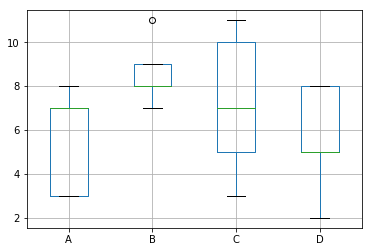

In [7]:
data.boxplot(figsize=(12, 8));

In [8]:
F, p = stats.f_oneway(data['A'], data['B'], data['C'], data['D'])
F,p

(1.6328125, 0.22133164752533896)

In [9]:
def onewayANOVA(data,alpha=0.05):
    s=data.shape[1]
    n=data.shape[0]*data.shape[1]
    F, p = stats.f_oneway(data['A'], data['B'], data['C'], data['D'])

    stat_str="The one-way ANOVA f statistic is "
    df_str=" with degrees of freedoms "
    p_str="the p-value is "
    cri_str=", critical value f is "
    f_cri = stats.f.ppf(q = 1-alpha,dfn=s-1,dfd=n-s)

    if (p>alpha):
       test_str="Test: do not reject H0: there is no difference among groups ";
    else:
       test_str="Test: reject H0, i.e. there is some difference amoung groups"; 
    print(stat_str,F,df_str,"(",s-1,",",n-s,")","\n",p_str,p,cri_str,f_cri,"\n",test_str)

In [10]:
onewayANOVA(data)

The one-way ANOVA f statistic is  1.6328125  with degrees of freedoms  ( 3 , 16 ) 
 the p-value is  0.221331647525 , critical value f is  3.23887151745 
 Test: do not reject H0: there is no difference among groups 
